# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from scipy.stats import linregress
from citipy import citipy
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#city = "London"
# city sample test the url
#query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
#query_url

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Utilize citipy to lookup for city names with geo-coordinates
# Lists of lat_lons and cities
geocoords = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
geocoords = zip(lats, lons)

#Identify nearest city for each lat, lon coordinate
for geocoord in geocoords:
    city = citipy.nearest_city(geocoord[0], geocoord[1]).city_name
    
#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# set lists for the dataframe

city_apd = []
cloudiness = []
dates = []
humidities = []
lats = []
lons = []
max_temps = []
wind_speeds = []
countries = []

# Initialize
count = 0
set_num = 1

print("\nBeginning of Data Retrieval\n------------------------------")
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        # A set processing 49 cities

        city_apd.append(city)
 
        print(f"Processing Record {count} of Set {set_num} | {city}")
    
# Every set has 50 records, from 0 to 49             
        if count > 48:
            count = 0
            set_num +=1
        else:    
            count +=1


    except Exception:
        print("City not found. Skipping...")
    
print("------------------------------\nEnd of Data Retrieval\n------------------------------")


Beginning of Data Retrieval
------------------------------
Processing Record 0 of Set 1 | saint anthony
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | mokrous
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | sanghar
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | vyartsilya
Processing Record 8 of Set 1 | banamba
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | rawah
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 1 | surt
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | avarua
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | maldonado
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | mar del plata
Proces

City not found. Skipping...
Processing Record 38 of Set 4 | antofagasta
Processing Record 39 of Set 4 | ciudad bolivar
Processing Record 40 of Set 4 | lumut
Processing Record 41 of Set 4 | alice springs
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | ouango
Processing Record 44 of Set 4 | kendari
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | belyy yar
City not found. Skipping...
Processing Record 48 of Set 4 | ust-tsilma
Processing Record 49 of Set 4 | tatarsk
Processing Record 0 of Set 5 | tessalit
Processing Record 1 of Set 5 | alta floresta
Processing Record 2 of Set 5 | murray bridge
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | porlamar
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | kargat
City not found. Skipping...
Processing Record 9 of Set 5 | buba

Processing Record 28 of Set 8 | palana
Processing Record 29 of Set 8 | high level
Processing Record 30 of Set 8 | marawi
Processing Record 31 of Set 8 | tura
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | prado
Processing Record 34 of Set 8 | green river
Processing Record 35 of Set 8 | evora
Processing Record 36 of Set 8 | ola
Processing Record 37 of Set 8 | sakakah
Processing Record 38 of Set 8 | mehamn
Processing Record 39 of Set 8 | yerbogachen
Processing Record 40 of Set 8 | ponta delgada
Processing Record 41 of Set 8 | gua musang
Processing Record 42 of Set 8 | bosaso
Processing Record 43 of Set 8 | clyde river
Processing Record 44 of Set 8 | poya
City not found. Skipping...
Processing Record 45 of Set 8 | panshi
Processing Record 46 of Set 8 | huarmey
Processing Record 47 of Set 8 | san vicente
Processing Record 48 of Set 8 | isangel
Processing Record 49 of Set 8 | nouadhibou
Processing Record 0 of Set 9 | nanortalik
Processing Record 1 of Set 9 | a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#weather_dict = pd.read_csv('../output_data/cities.csv')
#weather_dict

In [6]:
# create dictionary for establishing dataframe
weather_dict = {
    "City":city_apd,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lons,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

#weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint anthony,40,US,1602430689,66,45.02,-93.22,12.22,4.60
1,hilo,1,US,1602429984,60,19.73,-155.09,21.11,2.60
2,fortuna,0,US,1602430303,97,40.60,-124.16,10.56,1.22
3,mokrous,81,RU,1602430690,40,51.23,47.52,11.36,5.39
4,busselton,0,AU,1602430010,68,-33.65,115.33,11.11,3.26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Creat DataFrame where humidity is under 100%. In other words, remove where the humidity > 100%
weather_under100_df = weather_df[weather_df["Humidity"]<= 100]
weather_under100_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint anthony,40,US,1602430689,66,45.02,-93.22,12.22,4.60
1,hilo,1,US,1602429984,60,19.73,-155.09,21.11,2.60
2,fortuna,0,US,1602430303,97,40.60,-124.16,10.56,1.22
3,mokrous,81,RU,1602430690,40,51.23,47.52,11.36,5.39
4,busselton,0,AU,1602430010,68,-33.65,115.33,11.11,3.26


In [8]:
#  Get the indices of cities that have humidity over 100%.

index = weather_df[weather_df["Humidity"]> 100].index

#  Make a new DataFrame equal to the city weather data to drop all humidity outliers by index.
#  Passing "inplace=False" will make a copy of the city weather data DataFrame, which we call "clean_weather_df"

clean_weather_df = weather_df.drop(index, inplace=False)

clean_weather_df["Humidity"].describe()


count    536.000000
mean      68.902985
std       22.299782
min        7.000000
25%       56.000000
50%       74.500000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
# Print clean weather dataframe by humidity in descending order to make sure the humidity max is not over 100%

clean_weather_df.sort_values(by=["Humidity"], inplace=True, ascending=False)

clean_weather_df.head()
 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
315,alofi,58,NU,1602430333,100,-19.06,-169.92,22.00,6.20
497,eureka,1,US,1602430632,100,40.80,-124.16,10.00,1.50
444,uyaan,100,PH,1602430780,100,7.86,124.04,17.98,1.35
213,ulladulla,75,AU,1602430730,100,-35.35,150.47,14.44,2.60
224,aykhal,90,RU,1602430733,100,66.00,111.50,-9.00,1.00


In [10]:
# Output clean city data to a csv
clean_weather_df.to_csv('../output_data/cities_part_I.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

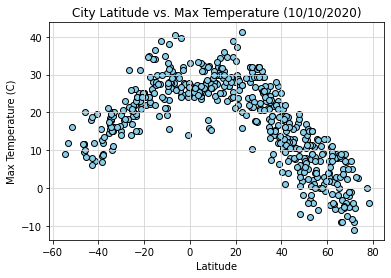

In [11]:
# create graph for latitude vs. Temperature
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

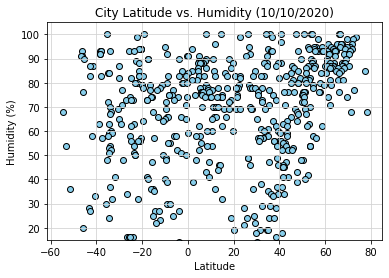

In [12]:
# create graph for latitude vs. humidity
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

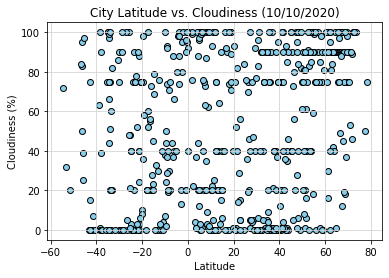

In [13]:
# create graph for latitude vs. cloudiness
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

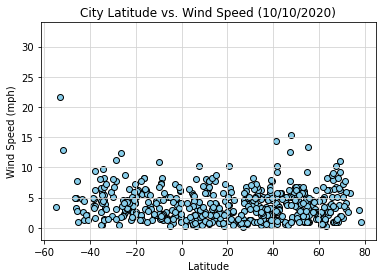

In [14]:
# Create graph for latitude vs. wind speed
plt.scatter(clean_weather_df["Lat"],clean_weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig_lat_vs_wind.png")
plt.show()

## Linear Regression

In [15]:
# Create Northern Hemisphere DataFrame
northern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) > 0, :]
# Create Southern Hemisphere DataFrame
southern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.49x + 34.72
The r-squared is: -0.8578374616479248
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


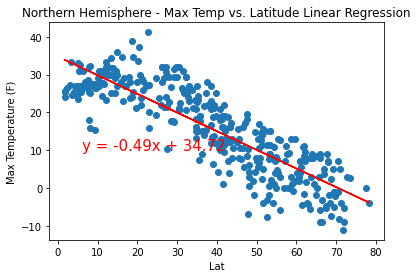

In [16]:
# # Create Northern Hemisphere DataFrame
# northern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) > 0, :]

# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("fig_north_temp_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 31.11
The r-squared is: 0.7647733716199935
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


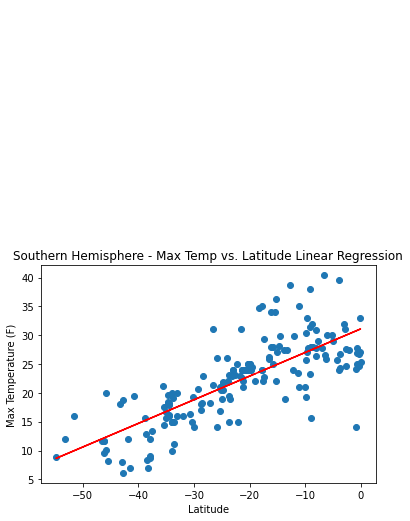

In [17]:
# # Create Southern Hemisphere DataFrame
# southern_df = clean_weather_df.loc[pd.to_numeric(clean_weather_df["Lat"]).astype(float) < 0, :]

# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,85),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("fig_south_temp_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 60.26
The r-squared is: 0.27681187877452207
The regression does not display much of a correlation between the data sets.


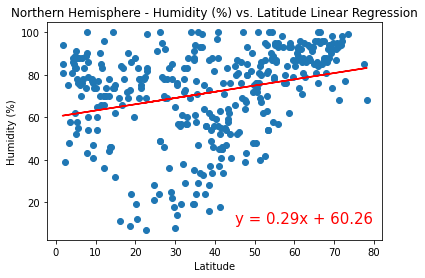

In [18]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("fig_north_hum_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 63.03
The r-squared is: -0.021845050312678787
The regression does not display much of a correlation between the data sets.


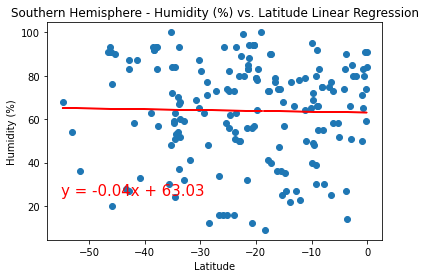

In [19]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_north_hum_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.5x + 34.45
The r-squared is: 0.2599559201152795
The regression does not display much of a correlation between the data sets.


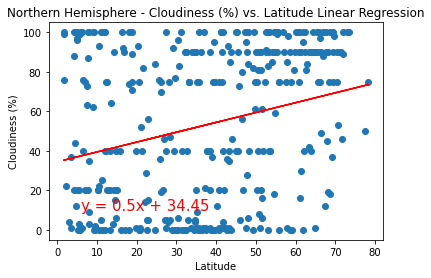

In [20]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_north_cloud_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.41x + 54.85
The r-squared is: 0.15126084662595327
The regression does not display much of a correlation between the data sets.


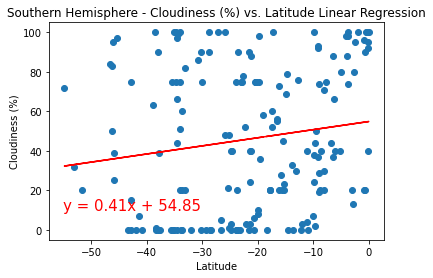

In [21]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_south_cloud_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 3.12
The r-squared is: 0.11968477830777105
The regression does not display much of a correlation between the data sets.


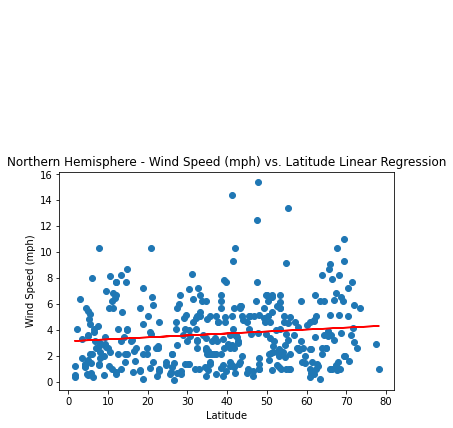

In [22]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_north_wind_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 3.18
The r-squared is: -0.22130494849527138
The regression does not display much of a correlation between the data sets.


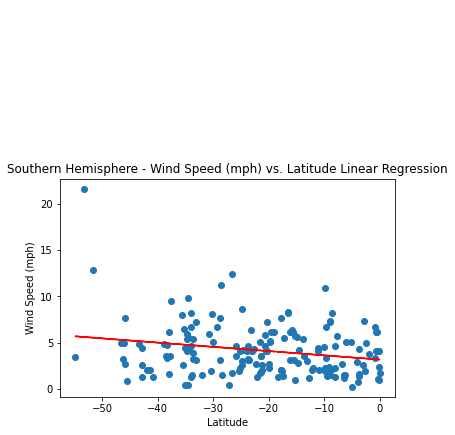

In [23]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("fig_sourth_wind_lat.png")
plt.show()